In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
data = {
    'Passengers': ['Passenger1', 'Passenger2', 'Passenger3'],
    'Raw price': [8500, 1200, 7800],
    'Raw cabin': [910, 2105, 1121],
    'Processed price': [0.85, 0.12, 0.78],
    'Processed cabin': [0.36, 0.84, 0.45],
    'Survival': [1, 0, 'NaN']
}

df = pd.DataFrame(data)
df

,Passengers,Raw price,Raw cabin,Processed price,Processed cabin,Survival
0,Passenger1,8500,910,0.85,0.36,1
1,Passenger2,1200,2105,0.12,0.84,0
2,Passenger3,7800,1121,0.78,0.45,NaN


Each vector represents a passenger of the Titanic, and specifies two features of the passenger. The price in dollars for the ticket, and the passenger's cabin number. Assuming the ticket price is between 0 and 10000 dollars, and the cabin numbers range from 1 and 2500. Each input vecotr is assigned a label that indicates if the passenger survived. The task is to find the probability of the third passenger of surviving. As done in machine learning, the data must be preprocessed to project it onto rouglhly the same scales. This is done by imposing zero mean and unit variance, so we rescale the range of possible ticket prices and cabin numbers to the interval (0,1) and round the values by two decimal digits. 

The simplest machine learning model is nearest neighbor. When a new input is given the same label as the data point closest to it is provided. The closenes is defined by a distance measure for example, Euclidean distance between data points.

In [61]:
# df['Raw price'] = df['Raw price'] / 10000
# df['Raw cabin'] = round(df['Raw cabin'] / 2500, 2)

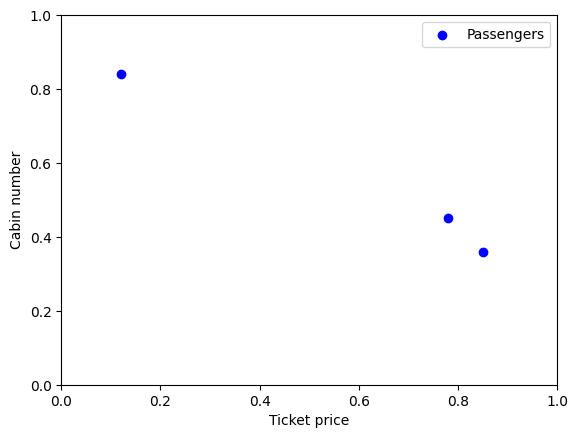

In [62]:
proc_price = df['Processed price'].to_numpy()
proc_cabin = df['Processed cabin'].to_numpy()

plt.scatter(proc_price, proc_cabin, color='blue', label='Passengers')
plt.xlabel('Ticket price')
plt.ylabel('Cabin number')
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend()
plt.show()

First more data preprocessing and data encoding is necessary. The values get normalized to one by projecting them onto a unit circle with a radius of one, this is attained by ensuring that the sum of their square values equal 1. This is to convert each feature to a unit length vector, by dividing the feature by the square sum of all features. The way this is done is by computing the Euclidean norm for each row across the two features of the price and cabin, then dividing each value in the row by this row-specific norm. This ensures that the length of each individual passenger is one, projecting it onto a unit circle.

The formula is
$$
norm = \sqrt{price^{2} + cabin^{2}}
$$

This then divides each value in the row by this norm

In [63]:
df['Vector Norm'] = np.sqrt(df['Processed price']**2 + df['Processed cabin']**2)
df['Normalized price'] = round(df['Processed price'] / df['Vector Norm'], 3)
df['Normalized cabin'] = round(df['Processed cabin'] / df['Vector Norm'], 3)

df = df.drop(columns=['Vector Norm'])

In [64]:
df

,Passengers,Raw price,Raw cabin,Processed price,Processed cabin,Survival,Normalized price,Normalized cabin
0,Passenger1,8500,910,0.85,0.36,1,0.921,0.39
1,Passenger2,1200,2105,0.12,0.84,0,0.141,0.99
2,Passenger3,7800,1121,0.78,0.45,NaN,0.866,0.50


Aditionally, the dataset is to be amplitude encoded. We have six features to encode and two class labels. We need three qubits to have 8 different measurement results $2^{n}$. Each measurement result is associated with an amplitude whose absolute square gives the probability of the result being observed. Amplitude encoding writes values of features into amplitudes and uses operations such as Hadamard transform to perform computations on the features, for instance additions and substractions.

The amplitude vector we need is equivalent to the vector constructed by concatenating the features of passengers 1 and 2, as well as two copies of the features of passenger 3, written as:

$\alpha = \frac{1}{\sqrt{4}}(0.921, 0.39, 0.141, 0.99, 0.866, 0.5, 0.866, 0.5)^{T}$

The absolute square of al amplitudes has to sum up to 1, which is why we had to include another scaling or normalization factor of $1/\sqrt{4}$ for the 4 data points. We now extend to a fourth qubit. For each feature encoded in an amplitude, the fourth qubit is the state that corresponds to the label of that feature vector. Since there is no target for the new input, the first copy and second copies associate with passengers 1 and 2, but other choices would work too. Adding the fourth qubit effectively pads the amplitude vector by some intermittent zeros

$\alpha = \frac{1}{\sqrt{4}}(0, 0.921, 0, 0.39, 0.141, 0, 0.99, 0,0,0.8666, 0, 0.5, 0.866, 0, 0.5, 0)^{T}$

In [ ]:
import pennylane as qml



We now multiply the amplitude vector by the Hadamard matrix. The result of the Hadamart gate computes the sums and differences between blocks of amplitudes, between the copies of the new input ot every training input.